In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

zip_path = "/content/archive (10).zip"

# List contents
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files in zip:\n")
    for name in z.namelist():
        print(name)

Files in zip:

Mall_Customers.csv


In [5]:
import zipfile
import os


zip_path = "/content/archive (9).zip"
extract_path = "/content/mall_customers"

# How To Create Extraction Folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Dataset extracted to: {extract_path}")


for root, dirs, files in os.walk(extract_path):
    for name in files[:20]:  # show only first 20 files
        print(os.path.join(root, name))





In [ ]:
df = pd.read_csv("/content/mall_customers")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
print("Dataset Info:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nDataset info:")
print(df.info())



Dataset Info:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset shape: (200, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [9]:
# Data preprocessing and scaling
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# To scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures before scaling:")
print(X.describe())



Features before scaling:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


Text(0.5, 1.0, 'Scaled Data Distribution')

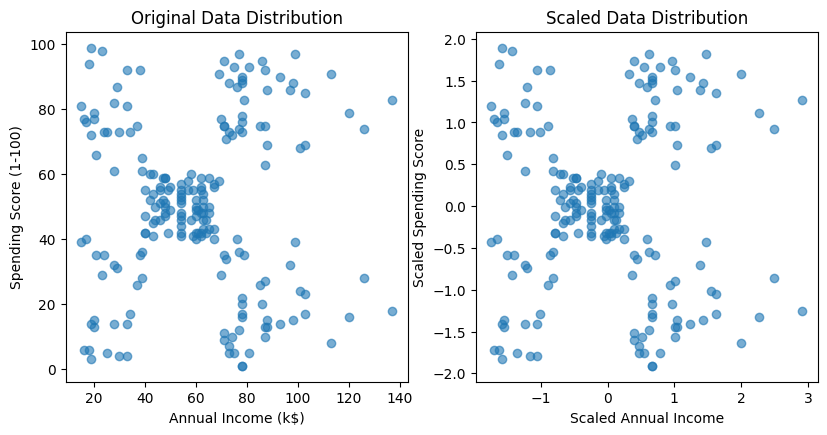

In [10]:
# Visual exploration
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data Distribution')

plt.subplot(2, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.6)
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Scaled Data Distribution')

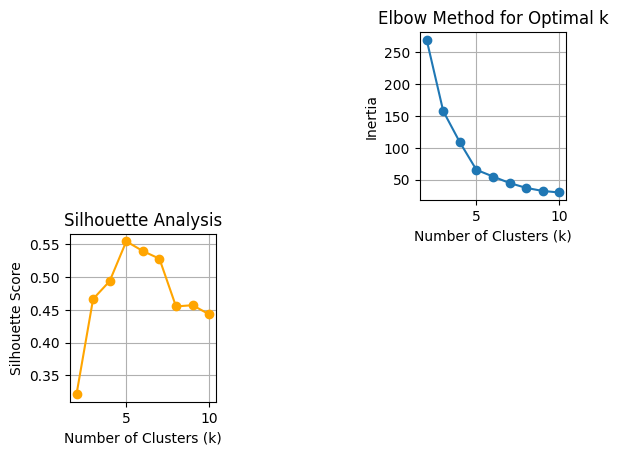

In [11]:
# Determine optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.subplot(2, 3, 3)
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)



In [12]:
# Find the optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")


Optimal number of clusters: 5


In [13]:
# Apply K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['KMeans_Cluster'] = kmeans_labels

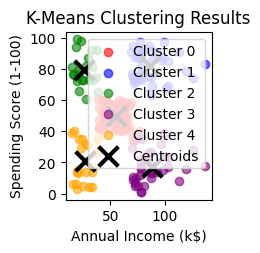

In [14]:
# Visualize K-Means clusters
plt.subplot(2, 3, 5)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
for i in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
           scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
           c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()

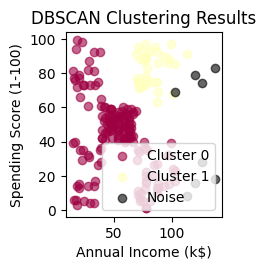

In [15]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.subplot(2, 3, 6)
unique_labels = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]
        label = 'Noise'
    else:
        label = f'Cluster {k}'

    class_member_mask = (dbscan_labels == k)
    xy = df[class_member_mask]
    plt.scatter(xy['Annual Income (k$)'], xy['Spending Score (1-100)'],
               c=[col], label=label, alpha=0.6)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering Results')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Analyze clusters - K-Means
print("\n" + "="*50)
print("K-MEANS CLUSTERING ANALYSIS")
print("="*50)

kmeans_stats = df.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'count'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Age': 'mean'
}).round(2)

print("\nK-Means Cluster Statistics:")
print(kmeans_stats)


K-MEANS CLUSTERING ANALYSIS

K-Means Cluster Statistics:
               Annual Income (k$)              Spending Score (1-100)         \
                             mean    std count                   mean    std   
KMeans_Cluster                                                                 
0                           55.30   8.99    81                  49.52   6.53   
1                           86.54  16.31    39                  82.13   9.36   
2                           25.73   7.57    22                  79.36  10.50   
3                           88.20  16.40    35                  17.11   9.95   
4                           26.30   7.89    23                  20.91  13.02   

                  Age  
                 mean  
KMeans_Cluster         
0               42.72  
1               32.69  
2               25.27  
3               41.11  
4               45.22  


In [17]:
# Average spending per cluster (K-Means)
avg_spending_kmeans = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean().sort_values(ascending=False)
print(f"\nAverage Spending Score per K-Means Cluster (Ranked):")
for cluster, avg_spending in avg_spending_kmeans.items():
    cluster_size = len(df[df['KMeans_Cluster'] == cluster])
    print(f"Cluster {cluster}: {avg_spending:.2f} (Size: {cluster_size} customers)")



Average Spending Score per K-Means Cluster (Ranked):
Cluster 1: 82.13 (Size: 39 customers)
Cluster 2: 79.36 (Size: 22 customers)
Cluster 0: 49.52 (Size: 81 customers)
Cluster 4: 20.91 (Size: 23 customers)
Cluster 3: 17.11 (Size: 35 customers)


In [21]:
# Analyze clusters - DBSCAN
print("\n" + "="*50)
print("DBSCAN CLUSTERING ANALYSIS")
print("="*50)

# Filter out noise points for analysis
dbscan_clean = df[df['DBSCAN_Cluster'] != -1]
noise_count = len(df[df['DBSCAN_Cluster'] == -1])

if len(dbscan_clean) > 0:
    dbscan_stats = dbscan_clean.groupby('DBSCAN_Cluster').agg({
        'Annual Income (k$)': ['mean', 'std', 'count'],
        'Spending Score (1-100)': ['mean', 'std'],
        'Age': 'mean'
    }).round(2)

    print(f"\nDBSCAN found {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} clusters")
    print(f"Noise points: {noise_count}")
    print("\nDBSCAN Cluster Statistics (excluding noise):")
    print(dbscan_stats)


# Average spending per cluster (DBSCAN)
    avg_spending_dbscan = dbscan_clean.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean().sort_values(ascending=False)
    print(f"\nAverage Spending Score per DBSCAN Cluster (Ranked):")
    for cluster, avg_spending in avg_spending_dbscan.items():
        cluster_size = len(dbscan_clean[dbscan_clean['DBSCAN_Cluster'] == cluster])
        print(f"Cluster {cluster}: {avg_spending:.2f} (Size: {cluster_size} customers)")
else:
    print("DBSCAN found no clusters, only noise points")

# Customer segment interpretation (K-Means)
print("\n" + "="*50)
print("CUSTOMER SEGMENT INTERPRETATION")
print("="*50)

def interpret_segment(cluster_id, income_mean, spending_mean):
    """Interpret customer segment based on income and spending patterns"""
    income_level = "High" if income_mean > df['Annual Income (k$)'].mean() else "Low"
    spending_level = "High" if spending_mean > df['Spending Score (1-100)'].mean() else "Low"

    if income_level == "High" and spending_level == "High":
        return "Premium Customers - High income, high spending"
    elif income_level == "High" and spending_level == "Low":
        return "Conservative Affluent - High income, low spending"
    elif income_level == "Low" and spending_level == "High":
        return "Spendthrift - Low income, high spending"
    else:
        return "Budget Conscious - Low income, low spending"

print("K-Means Customer Segments:")
for cluster in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    income_mean = cluster_data['Annual Income (k$)'].mean()
    spending_mean = cluster_data['Spending Score (1-100)'].mean()
    interpretation = interpret_segment(cluster, income_mean, spending_mean)
    print(f"\nCluster {cluster}: {interpretation}")
    print(f"  - Average Income: ${income_mean:.1f}k")
    print(f"  - Average Spending Score: {spending_mean:.1f}")
    print(f"  - Customer Count: {len(cluster_data)}")


DBSCAN CLUSTERING ANALYSIS

DBSCAN found 2 clusters
Noise points: 8

DBSCAN Cluster Statistics (excluding noise):
               Annual Income (k$)              Spending Score (1-100)         \
                             mean    std count                   mean    std   
DBSCAN_Cluster                                                                 
0                           52.49  21.81   157                   43.1  22.25   
1                           82.54  10.93    35                   82.8   9.50   

                  Age  
                 mean  
DBSCAN_Cluster         
0               40.37  
1               32.74  

Average Spending Score per DBSCAN Cluster (Ranked):
Cluster 1: 82.80 (Size: 35 customers)
Cluster 0: 43.10 (Size: 157 customers)

CUSTOMER SEGMENT INTERPRETATION
K-Means Customer Segments:

Cluster 0: Budget Conscious - Low income, low spending
  - Average Income: $55.3k
  - Average Spending Score: 49.5
  - Customer Count: 81

Cluster 1: Premium Customers - Hig

Create a Summary Vizualization

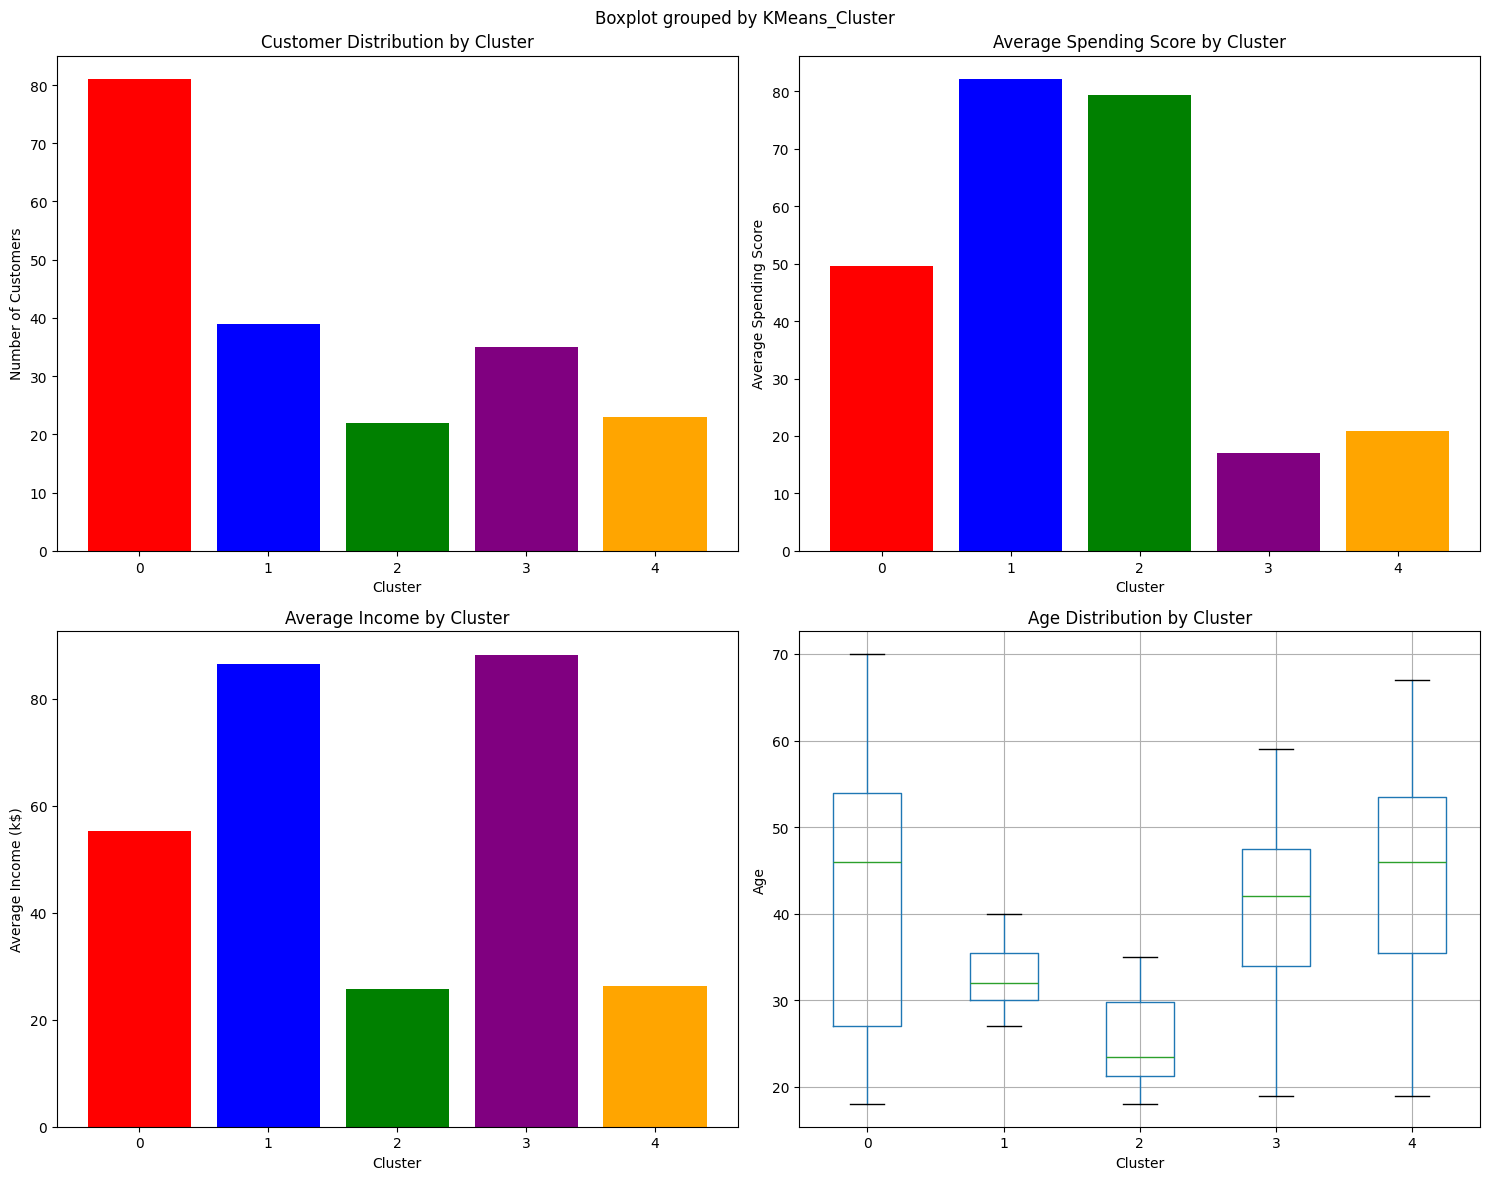


Analysis Complete!
Silhouette Score for K-Means (k=5): 0.555
Silhouette Score for DBSCAN: 0.350


In [22]:
# Create a summary visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cluster sizes
cluster_sizes = df['KMeans_Cluster'].value_counts().sort_index()
axes[0, 0].bar(range(len(cluster_sizes)), cluster_sizes.values, color=colors[:len(cluster_sizes)])
axes[0, 0].set_title('Customer Distribution by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].set_xticks(range(len(cluster_sizes)))

# Average spending by cluster
avg_spending = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
axes[0, 1].bar(range(len(avg_spending)), avg_spending.values, color=colors[:len(avg_spending)])
axes[0, 1].set_title('Average Spending Score by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Spending Score')
axes[0, 1].set_xticks(range(len(avg_spending)))

# Average income by cluster
avg_income = df.groupby('KMeans_Cluster')['Annual Income (k$)'].mean()
axes[1, 0].bar(range(len(avg_income)), avg_income.values, color=colors[:len(avg_income)])
axes[1, 0].set_title('Average Income by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Income (k$)')
axes[1, 0].set_xticks(range(len(avg_income)))

# Age distribution by cluster
df.boxplot(column='Age', by='KMeans_Cluster', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Age')

plt.tight_layout()
plt.show()

print(f"\nAnalysis Complete!")
print(f"Silhouette Score for K-Means (k={optimal_k}): {silhouette_score(X_scaled, kmeans_labels):.3f}")
if len(set(dbscan_labels)) > 1:
    print(f"Silhouette Score for DBSCAN: {silhouette_score(X_scaled, dbscan_labels):.3f}")